In [14]:
%config IPCompleter.greedy=True
import tensorflow as tf
import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

#### Loading Datasets

In [16]:
fashion_mnist = keras.datasets.fashion_mnist 
(Xf_train_full, yf_train_full), (Xf_test, yf_test) = fashion_mnist.load_data()
Xf_test = Xf_test / 255.0
Xf_valid, Xf_train = Xf_train_full[:5000] / 255.0, Xf_train_full[5000:] / 255.0
yf_valid, yf_train = yf_train_full[:5000], yf_train_full[5000:]

In [17]:
mnist = fetch_openml('mnist_784', version=1)
Xm, ym = mnist["data"].reshape(-1, 28, 28), mnist["target"]
ym = np.array(ym, dtype='uint8')
Xm_train_full, Xm_test, ym_train_full, ym_test = Xm[:60000], Xm[60000:], ym[:60000], ym[60000:]
Xm_valid, Xm_train = Xm_train_full[:5000] / 255.0, Xm_train_full[5000:] / 255.0
ym_valid, ym_train = ym_train_full[:5000], ym_train_full[5000:]

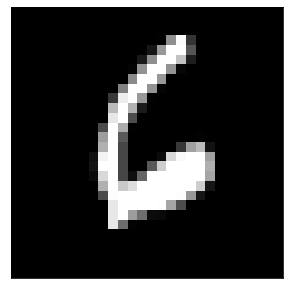

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.imshow(Xm_train[3], cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("MNIST_sample.png")

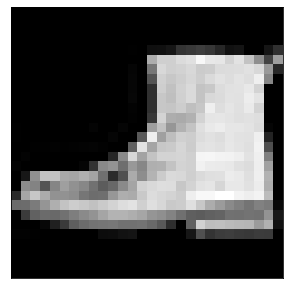

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.gca().imshow(Xf_train[3], cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("F_MNIST_sample.png")

#### Permuting Datasets

In [22]:
rnd_state = np.random.RandomState(seed=42)
permuter = rnd_state.permutation(784)

Xf_train = Xf_train.reshape(Xf_train.shape[0], -1, 1)
Xf_valid = Xf_valid.reshape(Xf_valid.shape[0], -1, 1)
Xf_test = Xf_test.reshape(Xf_test.shape[0], -1, 1)

Xf_train = Xf_train[:,permuter]
Xf_valid = Xf_valid[:,permuter]
Xf_test = Xf_test[:,permuter]

Xf_train = Xf_train.reshape(-1, 28, 28)
Xf_valid = Xf_valid.reshape(-1, 28, 28)
Xf_test = Xf_test.reshape(-1, 28, 28)


Xm_train = Xm_train.reshape(Xm_train.shape[0], -1, 1)
Xm_valid = Xm_valid.reshape(Xm_valid.shape[0], -1, 1)
Xm_test = Xm_test.reshape(Xm_test.shape[0], -1, 1)

Xm_train = Xm_train[:,permuter]
Xm_valid = Xm_valid[:,permuter]
Xm_test = Xm_test[:,permuter]

Xm_train = Xm_train.reshape(-1, 28, 28)
Xm_valid = Xm_valid.reshape(-1, 28, 28)
Xm_test = Xm_test.reshape(-1, 28, 28)

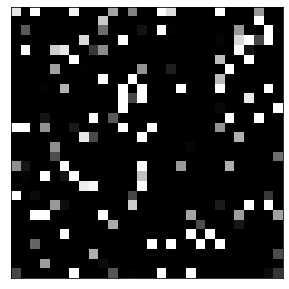

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.gca().imshow(Xm_train[3], cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("MNIST_sample_permuted.png")

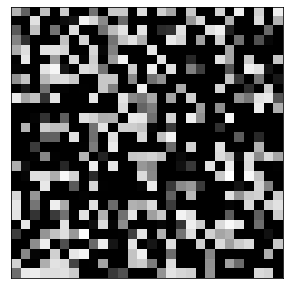

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.gca().imshow(Xf_train[3], cmap='gray')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("F_MNIST_sample_permuted.png")

#### Loading Best Models

In [21]:
def load_model(model_path):
        if os.path.exists(model_path):
            try:
                model = keras.models.load_model(model_path)
                # We are decreasing epsilon because model does not need to be eager to explore
                # self.epsilon = 0.01
                return model
            except:
                print("Error happened during loading the model!")
                raise IOError
        else:
            print("Model cannot found!")
            return IOError

In [22]:
def preprocessing(input_data):
    return np.expand_dims(input_data, axis=3)

In [23]:
mlp_model_path = "./models/mlp.h5"
cnn_model_path = "./models/cnn.h5"

mlp_net = load_model(mlp_model_path)
cnn_net = load_model(cnn_model_path)

### Retraining models on permuted datasets 

#### Permuted MNIST dataset

In [31]:
mlp_history = mlp_net.fit(Xm_train, ym_train, epochs=30, validation_data=(Xm_valid, ym_valid),
                          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 166us/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.1452 - val_accuracy: 0.9750
Epoch 2/30
55000/55000 [==============================] - 9s 163us/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.1514 - val_accuracy: 0.9738
Epoch 3/30
55000/55000 [==============================] - 9s 165us/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1421 - val_accuracy: 0.9776
Epoch 4/30
55000/55000 [==============================] - 9s 162us/step - loss: 2.9847e-04 - accuracy: 1.0000 - val_loss: 0.1369 - val_accuracy: 0.9786
Epoch 5/30
55000/55000 [==============================] - 9s 166us/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1434 - val_accuracy: 0.9768
Epoch 6/30
55000/55000 [==============================] - 9s 162us/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1582 - val_accuracy: 0.9746
Epoch 7/30
55000/55000 [==============================] - 9

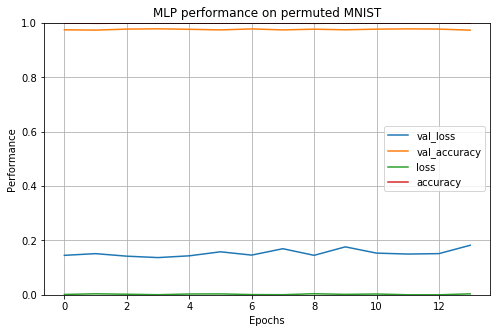

In [32]:
pd.DataFrame(mlp_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("MLP performance on permuted MNIST")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.savefig("MLP_permuted_MNIST.png")
plt.show()

In [33]:
mlp_net.evaluate(Xm_test, ym_test)

10000/10000 [==============================] - 0s 26us/step


[63.22194151306152, 0.968999981880188]

In [34]:
cnn_history = cnn_net.fit(preprocessing(Xm_train), ym_train, epochs=30, 
                          validation_data=(preprocessing(Xm_valid), ym_valid),
                          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 17s 312us/step - loss: 0.3876 - accuracy: 0.8814 - val_loss: 0.2544 - val_accuracy: 0.9280
Epoch 2/30
55000/55000 [==============================] - 17s 300us/step - loss: 0.3537 - accuracy: 0.8941 - val_loss: 0.2377 - val_accuracy: 0.9312
Epoch 3/30
55000/55000 [==============================] - 16s 299us/step - loss: 0.3299 - accuracy: 0.9018 - val_loss: 0.2267 - val_accuracy: 0.9374
Epoch 4/30
55000/55000 [==============================] - 16s 299us/step - loss: 0.3122 - accuracy: 0.9065 - val_loss: 0.2098 - val_accuracy: 0.9360
Epoch 5/30
55000/55000 [==============================] - 16s 284us/step - loss: 0.2927 - accuracy: 0.9115 - val_loss: 0.2061 - val_accuracy: 0.9392
Epoch 6/30
55000/55000 [==============================] - 15s 266us/step - loss: 0.2748 - accuracy: 0.9167 - val_loss: 0.1882 - val_accuracy: 0.9438
Epoch 7/30
55000/55000 [==============================] -

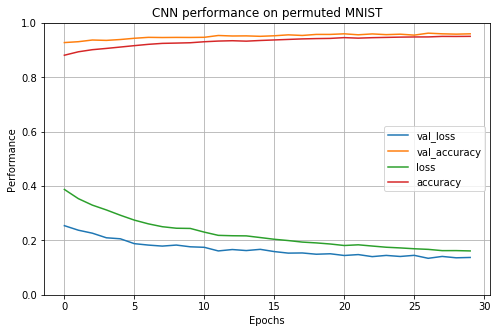

In [35]:
pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("CNN performance on permuted MNIST")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.savefig("CNN_permuted_MNIST.png")
plt.show()

In [36]:
cnn_net.evaluate(preprocessing(Xm_test), ym_test)

10000/10000 [==============================] - 2s 176us/step


[0.2842700809285045, 0.9143000245094299]

#### Permuted Fashion MNIST dataset

In [37]:
mlp_history = mlp_net.fit(Xf_train, yf_train, epochs=30, validation_data=(Xf_valid, yf_valid), 
                          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 167us/step - loss: 1.1415 - accuracy: 0.7337 - val_loss: 0.6125 - val_accuracy: 0.8068
Epoch 2/30
55000/55000 [==============================] - 9s 155us/step - loss: 0.5520 - accuracy: 0.8120 - val_loss: 0.5273 - val_accuracy: 0.8308
Epoch 3/30
55000/55000 [==============================] - 5s 91us/step - loss: 0.4785 - accuracy: 0.8335 - val_loss: 0.4827 - val_accuracy: 0.8412
Epoch 4/30
55000/55000 [==============================] - 7s 121us/step - loss: 0.4363 - accuracy: 0.8455 - val_loss: 0.4489 - val_accuracy: 0.8468
Epoch 5/30
55000/55000 [==============================] - 7s 119us/step - loss: 0.4072 - accuracy: 0.8544 - val_loss: 0.4333 - val_accuracy: 0.8540
Epoch 6/30
55000/55000 [==============================] - 6s 110us/step - loss: 0.3855 - accuracy: 0.8612 - val_loss: 0.4120 - val_accuracy: 0.8544
Epoch 7/30
55000/55000 [==============================] - 9s 160

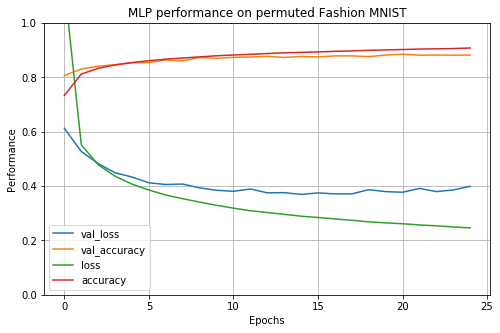

In [38]:
pd.DataFrame(mlp_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("MLP performance on permuted Fashion MNIST")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.savefig("MLP_permuted_F_MNIST.png")
plt.show()

In [39]:
mlp_net.evaluate(Xf_test, yf_test)

10000/10000 [==============================] - 0s 27us/step


[0.41861664735078813, 0.8702999949455261]

In [40]:
cnn_history = cnn_net.fit(preprocessing(Xf_train), yf_train, epochs=30, 
                          validation_data=(preprocessing(Xf_valid), yf_valid), 
                          callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 17s 304us/step - loss: 1.0622 - accuracy: 0.6325 - val_loss: 0.6146 - val_accuracy: 0.7762
Epoch 2/30
55000/55000 [==============================] - 16s 295us/step - loss: 0.7095 - accuracy: 0.7427 - val_loss: 0.5562 - val_accuracy: 0.8030
Epoch 3/30
55000/55000 [==============================] - 16s 294us/step - loss: 0.6368 - accuracy: 0.7715 - val_loss: 0.5082 - val_accuracy: 0.8226
Epoch 4/30
55000/55000 [==============================] - 16s 282us/step - loss: 0.6011 - accuracy: 0.7838 - val_loss: 0.4757 - val_accuracy: 0.8340
Epoch 5/30
55000/55000 [==============================] - 14s 253us/step - loss: 0.5776 - accuracy: 0.7945 - val_loss: 0.4740 - val_accuracy: 0.8348
Epoch 6/30
55000/55000 [==============================] - 15s 265us/step - loss: 0.5542 - accuracy: 0.8034 - val_loss: 0.4557 - val_accuracy: 0.8390
Epoch 7/30
55000/55000 [==============================] -

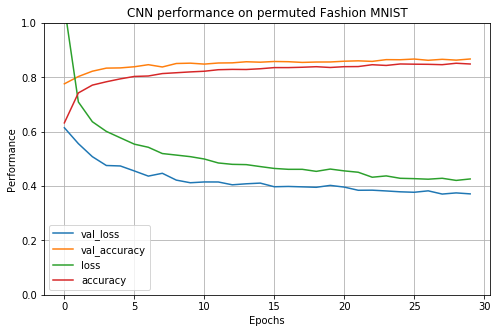

In [41]:
pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title("CNN performance on permuted Fashion MNIST")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.savefig("CNN_permuted_F_MNIST.png")
plt.show()

In [42]:
cnn_net.evaluate(preprocessing(Xf_test), yf_test)

10000/10000 [==============================] - 1s 148us/step


[0.4091084234237671, 0.8522999882698059]